In [1]:
!pip install WordCloud

In [2]:
# Data Wrangling
import pandas as pd
import numpy as np
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import cufflinks as cf
%matplotlib inline
%matplotlib notebook
from plotly.offline import iplot
py.offline.init_notebook_mode(connected = True)
cf.go_offline()
import plotly.graph_objects as go
from wordcloud import WordCloud

#NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib
import pickle
from IPython.display import display

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Modeling Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [4]:
from IPython.display import display

In [5]:
train_set = pd.read_csv(r"D:\ML Projects\NLP\Sentiment Analysis\Twitter Sentiment Analysis\train.csv")
test_set = pd.read_csv(r"D:\ML Projects\NLP\Sentiment Analysis\Twitter Sentiment Analysis\test.csv")
print("Training Set Data")
# train_set = pd.read_csv(r"/content/train.csv")
# test_set = pd.read_csv(r"/content/test.csv")
# print("Training Set Data")
display(train_set)
display(train_set.shape)
print("Testing Set Data")
display(test_set)
test_set.shape

Training Set Data


id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

(31962, 3)

Testing Set Data


id                                              tweet
0      31963  #studiolife #aislife #requires #passion #dedic...
1      31964   @user #white #supremacists want everyone to s...
2      31965  safe ways to heal your #acne!!    #altwaystohe...
3      31966  is the hp and the cursed child book up for res...
4      31967    3rd #bihday to my amazing, hilarious #nephew...
...      ...                                                ...
17192  49155  thought factory: left-right polarisation! #tru...
17193  49156  feeling like a mermaid ð #hairflip #neverre...
17194  49157  #hillary #campaigned today in #ohio((omg)) &am...
17195  49158  happy, at work conference: right mindset leads...
17196  49159  my   song "so glad" free download!  #shoegaze ...

[17197 rows x 2 columns]

(17197, 2)

In [6]:
df = pd.read_csv(r"D:\ML Projects\NLP\Sentiment Analysis\Twitter Sentiment Analysis\train.csv")
df
# df = pd.read_csv(r"/content/train.csv")
# df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [7]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [8]:
df.drop(columns=['id'],inplace=True)

In [9]:
df.isnull().sum()

label    0
tweet    0
dtype: int64

D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='label', ylabel='count'>

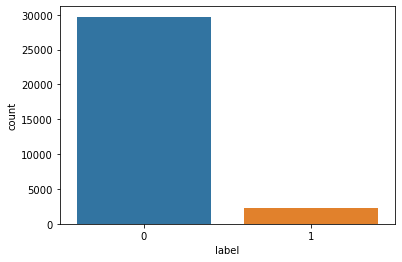

In [10]:
%matplotlib inline
sns.countplot(df['label'],data=df)

In [11]:
print("Tweet is not Racist")
df[df['label'] == 0]

Tweet is not Racist


label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31956      0  off fishing tomorrow @user carnt wait first ti...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31961      0                   thank you @user for you follow  

[29720 rows x 2 columns]

In [12]:
print("Tweet is Racist")
df[df['label'] == 1]

Tweet is Racist


label                                              tweet
13         1  @user #cnn calls #michigan middle school 'buil...
14         1  no comment!  in #australia   #opkillingbay #se...
17         1                             retweet if you agree! 
23         1    @user @user lumpy says i am a . prove it lumpy.
34         1  it's unbelievable that in the 21st century we'...
...      ...                                                ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...
31947      1  @user @user you don't have the balls to hashta...
31948      1   makes you ask yourself, who am i? then am i a...
31960      1  @user #sikh #temple vandalised in in #calgary,...

[2242 rows x 2 columns]

In [13]:
df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

In [14]:
# Checking for any Links in data if any links it will be removed
def removing_hyperlinks(text_list):
   #data is stored in the form of List    
    # Applying regex
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in text_list]

In [15]:
# Applying RegEx
removed_hyperlinks = removing_hyperlinks(df['tweet'])
df['tweet'] = removed_hyperlinks

## Before Pre-processing

In [16]:
df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [17]:
df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

In [18]:
print("Before Preprocessing")
df['tweet']

Before Preprocessing


0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [19]:
# Pre-Processing removing lower and upper case and converting into lower case
def preprocess(text):
    review = re.sub('[^a-zA-Z]',' ',text)
    review = review.lower()
    return review
df['tweet']= df['tweet'].apply(preprocess)
print("After Preprocessing")
df['tweet']

After Preprocessing


0          user when a father is dysfunctional and is s...
1         user  user thanks for  lyft credit i can t us...
2                                      bihday your majesty
3         model   i love u take with u all the time in ...
4                   factsguide  society now     motivation
                               ...                        
31957    ate  user isz that youuu                      ...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     user  sikh  temple vandalised in in  calgary ...
31961                     thank you  user for you follow  
Name: tweet, Length: 31962, dtype: object

In [20]:
# Examples of English stopwords
pt_stopwords = stopwords.words('english')
print(f'Total English stopwords in the nltk.corpous module: {len(pt_stopwords)}')
pt_stopwords[:100]

Total English stopwords in the nltk.corpous module: 179


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once']

In [21]:
# Defining a function to remove the stopwords and to lower the comments
def stopwords_removal_data(text, cached_stopwords=stopwords.words('english')):
    """
    ----------
    text: list object where the stopwords will be removed [type: list]
    cached_stopwords: stopwords to be applied on the process [type: list, default: stopwords.words('English')]
    """
    
    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]

In [22]:
# Removing stopwords and looking at some examples
reviews_stopwords_title = [' '.join(stopwords_removal_data(review_title)) for review_title in df['tweet']]
df['tweet'] = reviews_stopwords_title

In [23]:
df['tweet']

0        user father dysfunctional selfish drags kids d...
1        user user thanks lyft credit use cause offer w...
2                                           bihday majesty
3                              model love u take u time ur
4                            factsguide society motivation
                               ...                        
31957                                   ate user isz youuu
31958    see nina turner airwaves trying wrap mantle ge...
31959      listening sad songs monday morning otw work sad
31960    user sikh temple vandalised calgary wso condem...
31961                                    thank user follow
Name: tweet, Length: 31962, dtype: object

In [24]:
print("Tweet is not Racist")
Good_tweets = df[df['label'] == 0]
Good_tweets

Tweet is not Racist


label                                              tweet
0          0  user father dysfunctional selfish drags kids d...
1          0  user user thanks lyft credit use cause offer w...
2          0                                     bihday majesty
3          0                        model love u take u time ur
4          0                      factsguide society motivation
...      ...                                                ...
31956      0  fishing tomorrow user carnt wait first time years
31957      0                                 ate user isz youuu
31958      0  see nina turner airwaves trying wrap mantle ge...
31959      0    listening sad songs monday morning otw work sad
31961      0                                  thank user follow

[29720 rows x 2 columns]

In [25]:
Good_tweets_words= Good_tweets['tweet'].tolist()

In [26]:
Good_tweets_words

['user father dysfunctional selfish drags kids dysfunction run',
 'user user thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked',
 'bihday majesty',
 'model love u take u time ur',
 'factsguide society motivation',
 'huge fan fare big talking leave chaos pay disputes get allshowandnogo',
 'user camping tomorrow user user user user user user user danny',
 'next school year year exams think school exams hate imagine actorslife revolutionschool girl',
 'love land allin cavs champions cleveland clevelandcavaliers',
 'user user welcome gr',
 'ireland consumer price index mom climbed previous may blog silver gold forex',
 'selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love',
 'get see daddy today days gettingfed',
 'ouch junior angry got junior yugyoem omg',
 'thankful paner thankful positive',
 'friday smiles around via ig user user cookies make people',
 'know essential oils made chemicals',
 'euro people

In [27]:
Good= " ".join(Good_tweets_words)
Good

'user father dysfunctional selfish drags kids dysfunction run user user thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked bihday majesty model love u take u time ur factsguide society motivation huge fan fare big talking leave chaos pay disputes get allshowandnogo user camping tomorrow user user user user user user user danny next school year year exams think school exams hate imagine actorslife revolutionschool girl love land allin cavs champions cleveland clevelandcavaliers user user welcome gr ireland consumer price index mom climbed previous may blog silver gold forex selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love get see daddy today days gettingfed ouch junior angry got junior yugyoem omg thankful paner thankful positive friday smiles around via ig user user cookies make people know essential oils made chemicals euro people blaming ha conceded goal fat rooney gave away free kick knowing bale

In [28]:
Good_word = word_tokenize(Good)
Good_word

['user',
 'father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 'run',
 'user',
 'user',
 'thanks',
 'lyft',
 'credit',
 'use',
 'cause',
 'offer',
 'wheelchair',
 'vans',
 'pdx',
 'disapointed',
 'getthanked',
 'bihday',
 'majesty',
 'model',
 'love',
 'u',
 'take',
 'u',
 'time',
 'ur',
 'factsguide',
 'society',
 'motivation',
 'huge',
 'fan',
 'fare',
 'big',
 'talking',
 'leave',
 'chaos',
 'pay',
 'disputes',
 'get',
 'allshowandnogo',
 'user',
 'camping',
 'tomorrow',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'danny',
 'next',
 'school',
 'year',
 'year',
 'exams',
 'think',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'love',
 'land',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'user',
 'user',
 'welcome',
 'gr',
 'ireland',
 'consumer',
 'price',
 'index',
 'mom',
 'climbed',
 'previous',
 'may',
 'blog',
 'silver',
 'gold',
 'forex',
 'selfish',
 'orlando',
 'stan

In [29]:
Positive = " ".join(Good_word)

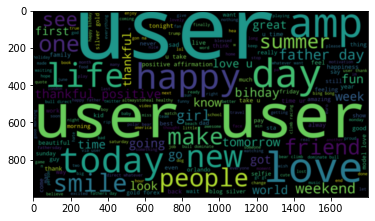

<Figure size 1440x1440 with 0 Axes>

In [30]:
%matplotlib inline
plt.imshow(WordCloud(width=1800,height=1000).generate_from_text(Positive), interpolation='gaussian')
plt.figure(figsize=(20,20))
plt.show()

In [31]:
print("Tweet is Racist")
Bad_tweets =df[df['label'] == 1].reset_index().drop(columns=['index'])
Bad_tweets

Tweet is Racist


label                                              tweet
0         1  user cnn calls michigan middle school build wa...
1         1  comment australia opkillingbay seashepherd hel...
2         1                                      retweet agree
3         1                   user user lumpy says prove lumpy
4         1  unbelievable st century need something like ne...
...     ...                                                ...
2237      1    lady banned kentucky mall user jcpenny kentucky
2238      1  user omfg offended mailbox proud mailboxpride ...
2239      1  user user balls hashtag say weasel away lumpy ...
2240      1                 makes ask anybody god oh thank god
2241      1  user sikh temple vandalised calgary wso condem...

[2242 rows x 2 columns]

In [32]:
Bad_tweets['tweet'][0]

'user cnn calls michigan middle school build wall chant tcot'

In [33]:
Bad_tweets_words= Bad_tweets['tweet'].tolist()
Bad_tweets_words

['user cnn calls michigan middle school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins',
 'retweet agree',
 'user user lumpy says prove lumpy',
 'unbelievable st century need something like neverump xenophobia',
 'user lets fight love peace',
 'white establishment blk folx running around loving promoting greatness',
 'user hey white people call people white user race identity med',
 'altright uses amp insecurity lure men whitesupremacy',
 'user interested linguistics address race amp racism power raciolinguistics brings',
 'user user mocked obama black user user user user brexit',
 'people protesting trump republican trump fuhered amp',
 'yes call michelleobama gorilla racists long thought black people bet',
 'smaller hands show barry probably lied knicks game sucked golf',
 'user user point one finger user millions pointed right back jewishsupremacist',
 'might libtard libtard sjw liberal politics',
 'user take trash amer

In [34]:
Bad= " ".join(Bad_tweets_words)
Bad

'user cnn calls michigan middle school build wall chant tcot comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins retweet agree user user lumpy says prove lumpy unbelievable st century need something like neverump xenophobia user lets fight love peace white establishment blk folx running around loving promoting greatness user hey white people call people white user race identity med altright uses amp insecurity lure men whitesupremacy user interested linguistics address race amp racism power raciolinguistics brings user user mocked obama black user user user user brexit people protesting trump republican trump fuhered amp yes call michelleobama gorilla racists long thought black people bet smaller hands show barry probably lied knicks game sucked golf user user point one finger user millions pointed right back jewishsupremacist might libtard libtard sjw liberal politics user take trash america voted hate voted voted vot hold open door woman woman nice th

In [35]:
Bad_word = word_tokenize(Bad)
Bad_word

['user',
 'cnn',
 'calls',
 'michigan',
 'middle',
 'school',
 'build',
 'wall',
 'chant',
 'tcot',
 'comment',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'retweet',
 'agree',
 'user',
 'user',
 'lumpy',
 'says',
 'prove',
 'lumpy',
 'unbelievable',
 'st',
 'century',
 'need',
 'something',
 'like',
 'neverump',
 'xenophobia',
 'user',
 'lets',
 'fight',
 'love',
 'peace',
 'white',
 'establishment',
 'blk',
 'folx',
 'running',
 'around',
 'loving',
 'promoting',
 'greatness',
 'user',
 'hey',
 'white',
 'people',
 'call',
 'people',
 'white',
 'user',
 'race',
 'identity',
 'med',
 'altright',
 'uses',
 'amp',
 'insecurity',
 'lure',
 'men',
 'whitesupremacy',
 'user',
 'interested',
 'linguistics',
 'address',
 'race',
 'amp',
 'racism',
 'power',
 'raciolinguistics',
 'brings',
 'user',
 'user',
 'mocked',
 'obama',
 'black',
 'user',
 'user',
 'user',
 'user',
 'brexit',
 'people',
 'protesting',
 'trump',
 'republican',
 

In [36]:
Negative = " ".join(Bad_word)

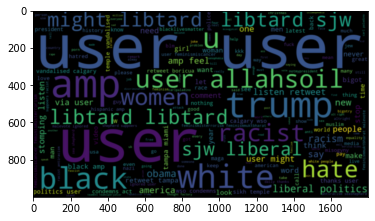

<Figure size 1440x1440 with 0 Axes>

In [37]:
%matplotlib inline
plt.imshow(WordCloud(width=1800,height=1000).generate_from_text(Negative), interpolation='gaussian')
plt.figure(figsize=(20,20))
plt.show()

## Before Removing User and Stop words from Corpus

Postive Tweets


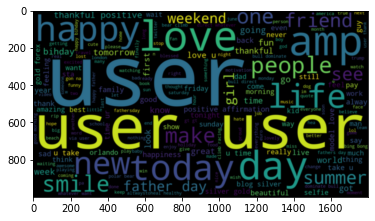

In [38]:
%matplotlib inline
print("Postive Tweets")
plt.imshow(WordCloud(width=1800,height=1000).generate_from_text(Positive), interpolation='gaussian')
plt.show()

Negative Tweets


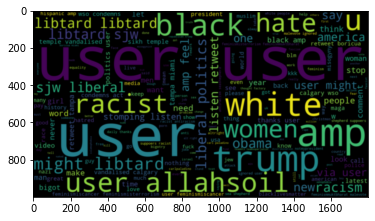

In [39]:
%matplotlib inline
print("Negative Tweets")
plt.imshow(WordCloud(width=1800,height=1000).generate_from_text(Negative), interpolation='gaussian')
plt.show()


## After Removing User and Stopwords

In [40]:
def specific_word_remove(text,word_remove):
    """"
    Remove a word from Corpus / Sentence
    Returns text without specific words
    """
    remove = word_remove
    words = word_tokenize(text)
    text = " ".join([word for word in words if word != remove])
    return text

In [41]:
specific_word_remove(Good,"user")

'father dysfunctional selfish drags kids dysfunction run thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked bihday majesty model love u take u time ur factsguide society motivation huge fan fare big talking leave chaos pay disputes get allshowandnogo camping tomorrow danny next school year year exams think school exams hate imagine actorslife revolutionschool girl love land allin cavs champions cleveland clevelandcavaliers welcome gr ireland consumer price index mom climbed previous may blog silver gold forex selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love get see daddy today days gettingfed ouch junior angry got junior yugyoem omg thankful paner thankful positive friday smiles around via ig cookies make people know essential oils made chemicals euro people blaming ha conceded goal fat rooney gave away free kick knowing bale hit sad little dude badday coneofshame cats pissed funny laughs product da

In [42]:
specific_word_remove(Bad,"user")

'cnn calls michigan middle school build wall chant tcot comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins retweet agree lumpy says prove lumpy unbelievable st century need something like neverump xenophobia lets fight love peace white establishment blk folx running around loving promoting greatness hey white people call people white race identity med altright uses amp insecurity lure men whitesupremacy interested linguistics address race amp racism power raciolinguistics brings mocked obama black brexit people protesting trump republican trump fuhered amp yes call michelleobama gorilla racists long thought black people bet smaller hands show barry probably lied knicks game sucked golf point one finger millions pointed right back jewishsupremacist might libtard libtard sjw liberal politics take trash america voted hate voted voted vot hold open door woman woman nice thing even try deny man ran governor ny state biggest african american population stere

Postive Tweets


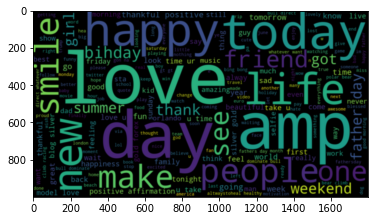

In [43]:
%matplotlib inline
print("Postive Tweets")
plt.imshow(WordCloud(width=1800,height=1000).generate_from_text(specific_word_remove(Good,"user")), interpolation='gaussian')
plt.show()

Negative Tweets


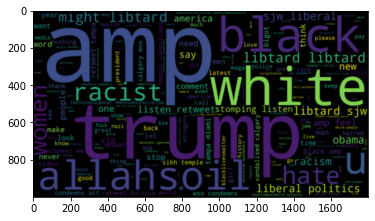

In [44]:
%matplotlib inline
print("Negative Tweets")
plt.imshow(WordCloud(width=1800,height=1000).generate_from_text(specific_word_remove(Bad,"user")), interpolation='gaussian')
plt.show()

In [45]:
Good_clean_word = word_tokenize(specific_word_remove(Good,"user"))
Good_clean_word

['father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 'run',
 'thanks',
 'lyft',
 'credit',
 'use',
 'cause',
 'offer',
 'wheelchair',
 'vans',
 'pdx',
 'disapointed',
 'getthanked',
 'bihday',
 'majesty',
 'model',
 'love',
 'u',
 'take',
 'u',
 'time',
 'ur',
 'factsguide',
 'society',
 'motivation',
 'huge',
 'fan',
 'fare',
 'big',
 'talking',
 'leave',
 'chaos',
 'pay',
 'disputes',
 'get',
 'allshowandnogo',
 'camping',
 'tomorrow',
 'danny',
 'next',
 'school',
 'year',
 'year',
 'exams',
 'think',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'love',
 'land',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'welcome',
 'gr',
 'ireland',
 'consumer',
 'price',
 'index',
 'mom',
 'climbed',
 'previous',
 'may',
 'blog',
 'silver',
 'gold',
 'forex',
 'selfish',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love

In [46]:
Postive_tweets = " ".join(Good_clean_word)

Postive Tweets


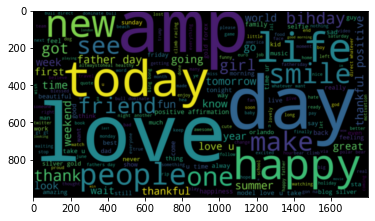

In [47]:
%matplotlib inline
print("Postive Tweets")
plt.imshow(WordCloud(width=1800,height=1000).generate_from_text(Postive_tweets), interpolation='gaussian')
plt.show()

In [48]:
Bad_clean_word = word_tokenize(specific_word_remove(Bad,"user"))
Bad_clean_word

['cnn',
 'calls',
 'michigan',
 'middle',
 'school',
 'build',
 'wall',
 'chant',
 'tcot',
 'comment',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'retweet',
 'agree',
 'lumpy',
 'says',
 'prove',
 'lumpy',
 'unbelievable',
 'st',
 'century',
 'need',
 'something',
 'like',
 'neverump',
 'xenophobia',
 'lets',
 'fight',
 'love',
 'peace',
 'white',
 'establishment',
 'blk',
 'folx',
 'running',
 'around',
 'loving',
 'promoting',
 'greatness',
 'hey',
 'white',
 'people',
 'call',
 'people',
 'white',
 'race',
 'identity',
 'med',
 'altright',
 'uses',
 'amp',
 'insecurity',
 'lure',
 'men',
 'whitesupremacy',
 'interested',
 'linguistics',
 'address',
 'race',
 'amp',
 'racism',
 'power',
 'raciolinguistics',
 'brings',
 'mocked',
 'obama',
 'black',
 'brexit',
 'people',
 'protesting',
 'trump',
 'republican',
 'trump',
 'fuhered',
 'amp',
 'yes',
 'call',
 'michelleobama',
 'gorilla',
 'racists',
 'long',
 'thought',
 'black'

In [49]:
Negative_tweets = " ".join(Bad_clean_word)
Negative_tweets

'cnn calls michigan middle school build wall chant tcot comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins retweet agree lumpy says prove lumpy unbelievable st century need something like neverump xenophobia lets fight love peace white establishment blk folx running around loving promoting greatness hey white people call people white race identity med altright uses amp insecurity lure men whitesupremacy interested linguistics address race amp racism power raciolinguistics brings mocked obama black brexit people protesting trump republican trump fuhered amp yes call michelleobama gorilla racists long thought black people bet smaller hands show barry probably lied knicks game sucked golf point one finger millions pointed right back jewishsupremacist might libtard libtard sjw liberal politics take trash america voted hate voted voted vot hold open door woman woman nice thing even try deny man ran governor ny state biggest african american population stere

Negative Tweets


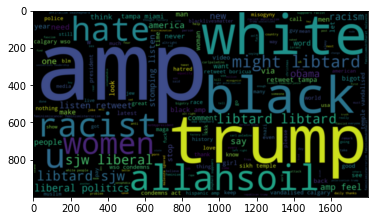

In [50]:
%matplotlib inline
print("Negative Tweets")
plt.imshow(WordCloud(width=1800,height=1000).generate_from_text(Negative_tweets), interpolation='gaussian')
plt.show()

In [51]:
df

label                                              tweet
0          0  user father dysfunctional selfish drags kids d...
1          0  user user thanks lyft credit use cause offer w...
2          0                                     bihday majesty
3          0                        model love u take u time ur
4          0                      factsguide society motivation
...      ...                                                ...
31957      0                                 ate user isz youuu
31958      0  see nina turner airwaves trying wrap mantle ge...
31959      0    listening sad songs monday morning otw work sad
31960      1  user sikh temple vandalised calgary wso condem...
31961      0                                  thank user follow

[31962 rows x 2 columns]

In [52]:
len(df)

31962

In [53]:
display(df['label'].value_counts())
print((df['label'].value_counts()/(len(df)))*100)

0    29720
1     2242
Name: label, dtype: int64

0    92.98542
1     7.01458
Name: label, dtype: float64


In [54]:
new_df =df.iloc[:20000,:]

In [55]:
display(new_df['label'].value_counts())
print((new_df['label'].value_counts()/(len(new_df)))*100)

0    18615
1     1385
Name: label, dtype: int64

0    93.075
1     6.925
Name: label, dtype: float64


In [56]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
corpus = []
for i in range(0,len(new_df)):
    review = re.sub('[^a-zA-Z]',' ',new_df['tweet'][i])
    review = review.lower()
    review = review.split() #convert into list
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
corpus

['user father dysfunct selfish drag kid dysfunct run',
 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank',
 'bihday majesti',
 'model love u take u time ur',
 'factsguid societi motiv',
 'huge fan fare big talk leav chao pay disput get allshowandnogo',
 'user camp tomorrow user user user user user user user danni',
 'next school year year exam think school exam hate imagin actorslif revolutionschool girl',
 'love land allin cav champion cleveland clevelandcavali',
 'user user welcom gr',
 'ireland consum price index mom climb previou may blog silver gold forex',
 'selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love',
 'get see daddi today day gettingf',
 'user cnn call michigan middl school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin',
 'ouch junior angri got junior yugyoem omg',
 'thank paner thank posit',
 'retweet agre',
 'friday smile around

In [58]:
clean_data = " ".join(corpus)

In [59]:
clean_word = word_tokenize(specific_word_remove(clean_data,"user"))
clean_word

['father',
 'dysfunct',
 'selfish',
 'drag',
 'kid',
 'dysfunct',
 'run',
 'thank',
 'lyft',
 'credit',
 'use',
 'caus',
 'offer',
 'wheelchair',
 'van',
 'pdx',
 'disapoint',
 'getthank',
 'bihday',
 'majesti',
 'model',
 'love',
 'u',
 'take',
 'u',
 'time',
 'ur',
 'factsguid',
 'societi',
 'motiv',
 'huge',
 'fan',
 'fare',
 'big',
 'talk',
 'leav',
 'chao',
 'pay',
 'disput',
 'get',
 'allshowandnogo',
 'camp',
 'tomorrow',
 'danni',
 'next',
 'school',
 'year',
 'year',
 'exam',
 'think',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'love',
 'land',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'welcom',
 'gr',
 'ireland',
 'consum',
 'price',
 'index',
 'mom',
 'climb',
 'previou',
 'may',
 'blog',
 'silver',
 'gold',
 'forex',
 'selfish',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'get',
 'see',
 'daddi',
 'today',
 'day',
 'gettingf',


In [60]:
All_tweets = " ".join(clean_word)
All_tweets

'father dysfunct selfish drag kid dysfunct run thank lyft credit use caus offer wheelchair van pdx disapoint getthank bihday majesti model love u take u time ur factsguid societi motiv huge fan fare big talk leav chao pay disput get allshowandnogo camp tomorrow danni next school year year exam think school exam hate imagin actorslif revolutionschool girl love land allin cav champion cleveland clevelandcavali welcom gr ireland consum price index mom climb previou may blog silver gold forex selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love get see daddi today day gettingf cnn call michigan middl school build wall chant tcot comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin ouch junior angri got junior yugyoem omg thank paner thank posit retweet agre friday smile around via ig cooki make peopl know essenti oil made chemic euro peopl blame ha conced goal fat rooney gave away free kick know bale hit sad littl du

All Tweets


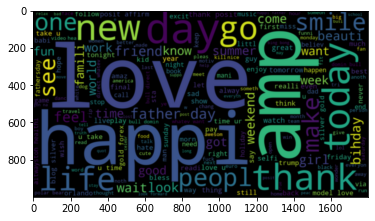

<Figure size 1440x1440 with 0 Axes>

In [61]:
%matplotlib inline
print("All Tweets")
plt.imshow(WordCloud(width=1800,height=1000).generate_from_text(All_tweets), interpolation='gaussian')
plt.figure(figsize=(20,20))
plt.show()

In [62]:
df['tweet']

0        user father dysfunctional selfish drags kids d...
1        user user thanks lyft credit use cause offer w...
2                                           bihday majesty
3                              model love u take u time ur
4                            factsguide society motivation
                               ...                        
31957                                   ate user isz youuu
31958    see nina turner airwaves trying wrap mantle ge...
31959      listening sad songs monday morning otw work sad
31960    user sikh temple vandalised calgary wso condem...
31961                                    thank user follow
Name: tweet, Length: 31962, dtype: object

In [63]:
corpus

['user father dysfunct selfish drag kid dysfunct run',
 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank',
 'bihday majesti',
 'model love u take u time ur',
 'factsguid societi motiv',
 'huge fan fare big talk leav chao pay disput get allshowandnogo',
 'user camp tomorrow user user user user user user user danni',
 'next school year year exam think school exam hate imagin actorslif revolutionschool girl',
 'love land allin cav champion cleveland clevelandcavali',
 'user user welcom gr',
 'ireland consum price index mom climb previou may blog silver gold forex',
 'selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love',
 'get see daddi today day gettingf',
 'user cnn call michigan middl school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin',
 'ouch junior angri got junior yugyoem omg',
 'thank paner thank posit',
 'retweet agre',
 'friday smile around

In [64]:
clean_word

['father',
 'dysfunct',
 'selfish',
 'drag',
 'kid',
 'dysfunct',
 'run',
 'thank',
 'lyft',
 'credit',
 'use',
 'caus',
 'offer',
 'wheelchair',
 'van',
 'pdx',
 'disapoint',
 'getthank',
 'bihday',
 'majesti',
 'model',
 'love',
 'u',
 'take',
 'u',
 'time',
 'ur',
 'factsguid',
 'societi',
 'motiv',
 'huge',
 'fan',
 'fare',
 'big',
 'talk',
 'leav',
 'chao',
 'pay',
 'disput',
 'get',
 'allshowandnogo',
 'camp',
 'tomorrow',
 'danni',
 'next',
 'school',
 'year',
 'year',
 'exam',
 'think',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'love',
 'land',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'welcom',
 'gr',
 'ireland',
 'consum',
 'price',
 'index',
 'mom',
 'climb',
 'previou',
 'may',
 'blog',
 'silver',
 'gold',
 'forex',
 'selfish',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'get',
 'see',
 'daddi',
 'today',
 'day',
 'gettingf',


In [65]:
print(word_tokenize(Bad_tweets['tweet'][1]))

['comment', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphins', 'thecove', 'helpcovedolphins']


In [66]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()
# words = cv.fit_transform(corpus)
# sum_words = words.sum(axis=0)
# len(sum_words)

# words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
# words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

# frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
# plt.title("Most Frequently Occuring Words - Top 30")

In [67]:
corpus

['user father dysfunct selfish drag kid dysfunct run',
 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank',
 'bihday majesti',
 'model love u take u time ur',
 'factsguid societi motiv',
 'huge fan fare big talk leav chao pay disput get allshowandnogo',
 'user camp tomorrow user user user user user user user danni',
 'next school year year exam think school exam hate imagin actorslif revolutionschool girl',
 'love land allin cav champion cleveland clevelandcavali',
 'user user welcom gr',
 'ireland consum price index mom climb previou may blog silver gold forex',
 'selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love',
 'get see daddi today day gettingf',
 'user cnn call michigan middl school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin',
 'ouch junior angri got junior yugyoem omg',
 'thank paner thank posit',
 'retweet agre',
 'friday smile around

In [68]:
All_tweets

'father dysfunct selfish drag kid dysfunct run thank lyft credit use caus offer wheelchair van pdx disapoint getthank bihday majesti model love u take u time ur factsguid societi motiv huge fan fare big talk leav chao pay disput get allshowandnogo camp tomorrow danni next school year year exam think school exam hate imagin actorslif revolutionschool girl love land allin cav champion cleveland clevelandcavali welcom gr ireland consum price index mom climb previou may blog silver gold forex selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love get see daddi today day gettingf cnn call michigan middl school build wall chant tcot comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin ouch junior angri got junior yugyoem omg thank paner thank posit retweet agre friday smile around via ig cooki make peopl know essenti oil made chemic euro peopl blame ha conced goal fat rooney gave away free kick know bale hit sad littl du

In [69]:
print(clean_word)

['father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', 'run', 'thank', 'lyft', 'credit', 'use', 'caus', 'offer', 'wheelchair', 'van', 'pdx', 'disapoint', 'getthank', 'bihday', 'majesti', 'model', 'love', 'u', 'take', 'u', 'time', 'ur', 'factsguid', 'societi', 'motiv', 'huge', 'fan', 'fare', 'big', 'talk', 'leav', 'chao', 'pay', 'disput', 'get', 'allshowandnogo', 'camp', 'tomorrow', 'danni', 'next', 'school', 'year', 'year', 'exam', 'think', 'school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl', 'love', 'land', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali', 'welcom', 'gr', 'ireland', 'consum', 'price', 'index', 'mom', 'climb', 'previou', 'may', 'blog', 'silver', 'gold', 'forex', 'selfish', 'orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love', 'get', 'see', 'daddi', 'today', 'day', 'gettingf', 'cnn', 'call', 'michigan', 'middl', 'school', 'build', 'wall', 'chant', 'tcot', 'comment', 'a

In [70]:
from sklearn.feature_extraction.text import CountVectorizer


#Creating the bag of words
bow_article = CountVectorizer().fit(corpus)

count_tokens=bow_article.get_feature_names()

article_vect = bow_article.transform(corpus)
count_tokens

['aa',
 'aaa',
 'aaaaah',
 'aaaaand',
 'aaahh',
 'aaahhhhh',
 'aaberg',
 'aadityaji',
 'aal',
 'aalivyahsimon',
 'aamaadmipay',
 'aamirkhan',
 'aand',
 'aap',
 'aarhu',
 'aaron',
 'aarya',
 'aaryn',
 'aascf',
 'ab',
 'aba',
 'abandon',
 'abantu',
 'abasel',
 'abba',
 'abbi',
 'abbibucket',
 'abbotabad',
 'abbu',
 'abbyybel',
 'abc',
 'abdomin',
 'abe',
 'abella',
 'aberdeen',
 'abet',
 'abglp',
 'abhishek',
 'abi',
 'abid',
 'abil',
 'abitur',
 'abl',
 'ableg',
 'ableism',
 'ablond',
 'abndp',
 'abo',
 'aboion',
 'abomin',
 'abou',
 'aboutlastnight',
 'aboutmynextmov',
 'abraham',
 'abrahamhick',
 'abricotin',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'abstract',
 'abstracta',
 'abstractaist',
 'abstractpaint',
 'absurd',
 'absurdli',
 'abt',
 'abtoffici',
 'abu',
 'abudhabi',
 'abuela',
 'abuja',
 'abund',
 'abus',
 'abxc',
 'ac',
 'acab',
 'academ',
 'academi',
 'academia',
 'acapella',
 'acc',
 'acceler',
 'accent',
 'accept',
 'access',
 'accessnetwork',
 'accessori',
 'acch',


In [71]:
article_vect

<20000x23236 sparse matrix of type '<class 'numpy.int64'>'
	with 152897 stored elements in Compressed Sparse Row format>

In [72]:
# Creating the bag of Word Model
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer()
X=article_vect.toarray()
y=new_df['label'].values

In [73]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
X.shape,y.shape

((20000, 23236), (20000,))

In [75]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



In [77]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [78]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [79]:
y_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [80]:
y_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

# Random Forest

Accuracy: 0.96
Auc: 0.72
Detail:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4661
           1       0.92      0.44      0.59       339

    accuracy                           0.96      5000
   macro avg       0.94      0.72      0.79      5000
weighted avg       0.96      0.96      0.95      5000

True Positive
[4648.  148.]
True Negative
[ 148. 4648.]
False Positive
[191.  13.]
False Negative
[ 13. 191.]
Recall
[0.9972109  0.43657817]
True Negative Rate
[0.43657817 0.9972109 ]
Precision
[0.96052903 0.91925466]
Negative Predicitve Value
[0.91925466 0.96052903]
False Positive Rate
[0.56342183 0.0027891 ]
False Negative Rate
[0.0027891  0.56342183]
Accuracy per Fault
[0.9592 0.9592]
0.9592


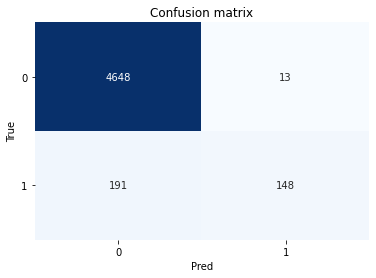

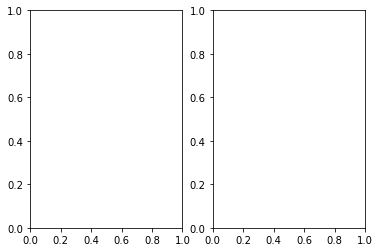

In [81]:
#########RandomForestClassifier
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators =100,criterion="entropy",random_state =0)
classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, y_pred))
classes = np.unique(y_test)



FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
print("True Positive")
print(TP)
print("True Negative")
print(TN)
print("False Positive")
print(FP)
print("False Negative")
print(FN)
# Sensitivity, hit rate, recall, or true positive rate
Recall = TP/(TP+FN)
print('Recall')
print(Recall)
# Specificity or true negative rate
TNR = TN/(TN+FP)
print("True Negative Rate") 
print(TNR)
# Precision or positive predictive value
Precision = TP/(TP+FP)
print("Precision")
print(Precision)
# Negative predictive value
NPV = TN/(TN+FN)
print("Negative Predicitve Value")
print(NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate")
print(FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate")
print(FNR)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
Accuracy = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy per Fault")
print(Accuracy)

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
fig, ax = plt.subplots(nrows=1, ncols=2)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial',penalty='l2')
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Results for Logistic Regression with tfidf")
print(lr_score)
y_pred_lr = lr.predict(X_test)

D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Results for Logistic Regression with tfidf
0.9608


In [86]:
cmx = confusion_matrix(y_test, y_pred_lr)

In [87]:
FP = cmx.sum(axis=0) - np.diag(cmx) 
FN = cmx.sum(axis=1) - np.diag(cmx)
TP = np.diag(cmx)
TN = cmx.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
print("True Positive")
print(TP)
print("True Negative")
print(TN)
print("False Positive")
print(FP)
print("False Negative")
print(FN)
# Sensitivity, hit rate, recall, or true positive rate
Recall = TP/(TP+FN)
print('Recall')
print(Recall)
# Specificity or true negative rate
TNR = TN/(TN+FP)
print("True Negative Rate") 
print(TNR)
# Precision or positive predictive value
Precision = TP/(TP+FP)
print("Precision")
print(Precision)
# Negative predictive value
NPV = TN/(TN+FN)
print("Negative Predicitve Value")
print(NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate")
print(FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate")
print(FNR)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
Accuracy = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy per Fault")
print(Accuracy)

True Positive
[4617.  187.]
True Negative
[ 187. 4617.]
False Positive
[152.  44.]
False Negative
[ 44. 152.]
Recall
[0.99055997 0.55162242]
True Negative Rate
[0.55162242 0.99055997]
Precision
[0.96812749 0.80952381]
Negative Predicitve Value
[0.80952381 0.96812749]
False Positive Rate
[0.44837758 0.00944003]
False Negative Rate
[0.00944003 0.44837758]
Accuracy per Fault
[0.9608 0.9608]


In [92]:
#Naive Bayes - gaussain
from sklearn.naive_bayes import MultinomialNB ,GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('clf', GaussianNB())
                    ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred_nb = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_nb, y_test))
print(classification_report(y_test, y_pred_nb))

accuracy 0.8382
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      4661
           1       0.22      0.54      0.31       339

    accuracy                           0.84      5000
   macro avg       0.59      0.70      0.61      5000
weighted avg       0.91      0.84      0.87      5000



In [93]:
# Naive Bayes - MultinomialNB
from sklearn.naive_bayes import MultinomialNB ,GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

mnb = Pipeline([('clf',MultinomialNB())
                    ])
mnb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred_mnb = mnb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_mnb, y_test))
print(classification_report(y_test, y_pred_mnb))

accuracy 0.9436
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4661
           1       0.60      0.52      0.56       339

    accuracy                           0.94      5000
   macro avg       0.78      0.75      0.76      5000
weighted avg       0.94      0.94      0.94      5000

